In [226]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [400]:
dataset = pd.read_csv('./pima-indians-diabetes.csv')

In [3]:
print(dataset.describe())

            Class     Alcohol   MalicAcid         Ash  AshAlcalinity  \
count  178.000000  178.000000  178.000000  178.000000     178.000000   
mean     1.938202   13.000618    2.336348    2.366517      19.494944   
std      0.775035    0.811827    1.117146    0.274344       3.339564   
min      1.000000   11.030000    0.740000    1.360000      10.600000   
25%      1.000000   12.362500    1.602500    2.210000      17.200000   
50%      2.000000   13.050000    1.865000    2.360000      19.500000   
75%      3.000000   13.677500    3.082500    2.557500      21.500000   
max      3.000000   14.830000    5.800000    3.230000      30.000000   

        Magnesium  TotalPhenols  Flavonoids  NonflavonoidPhenols  \
count  178.000000    178.000000  178.000000           178.000000   
mean    99.741573      2.295112    2.029270             0.361854   
std     14.282484      0.625851    0.998859             0.124453   
min     70.000000      0.980000    0.340000             0.130000   
25%     88.

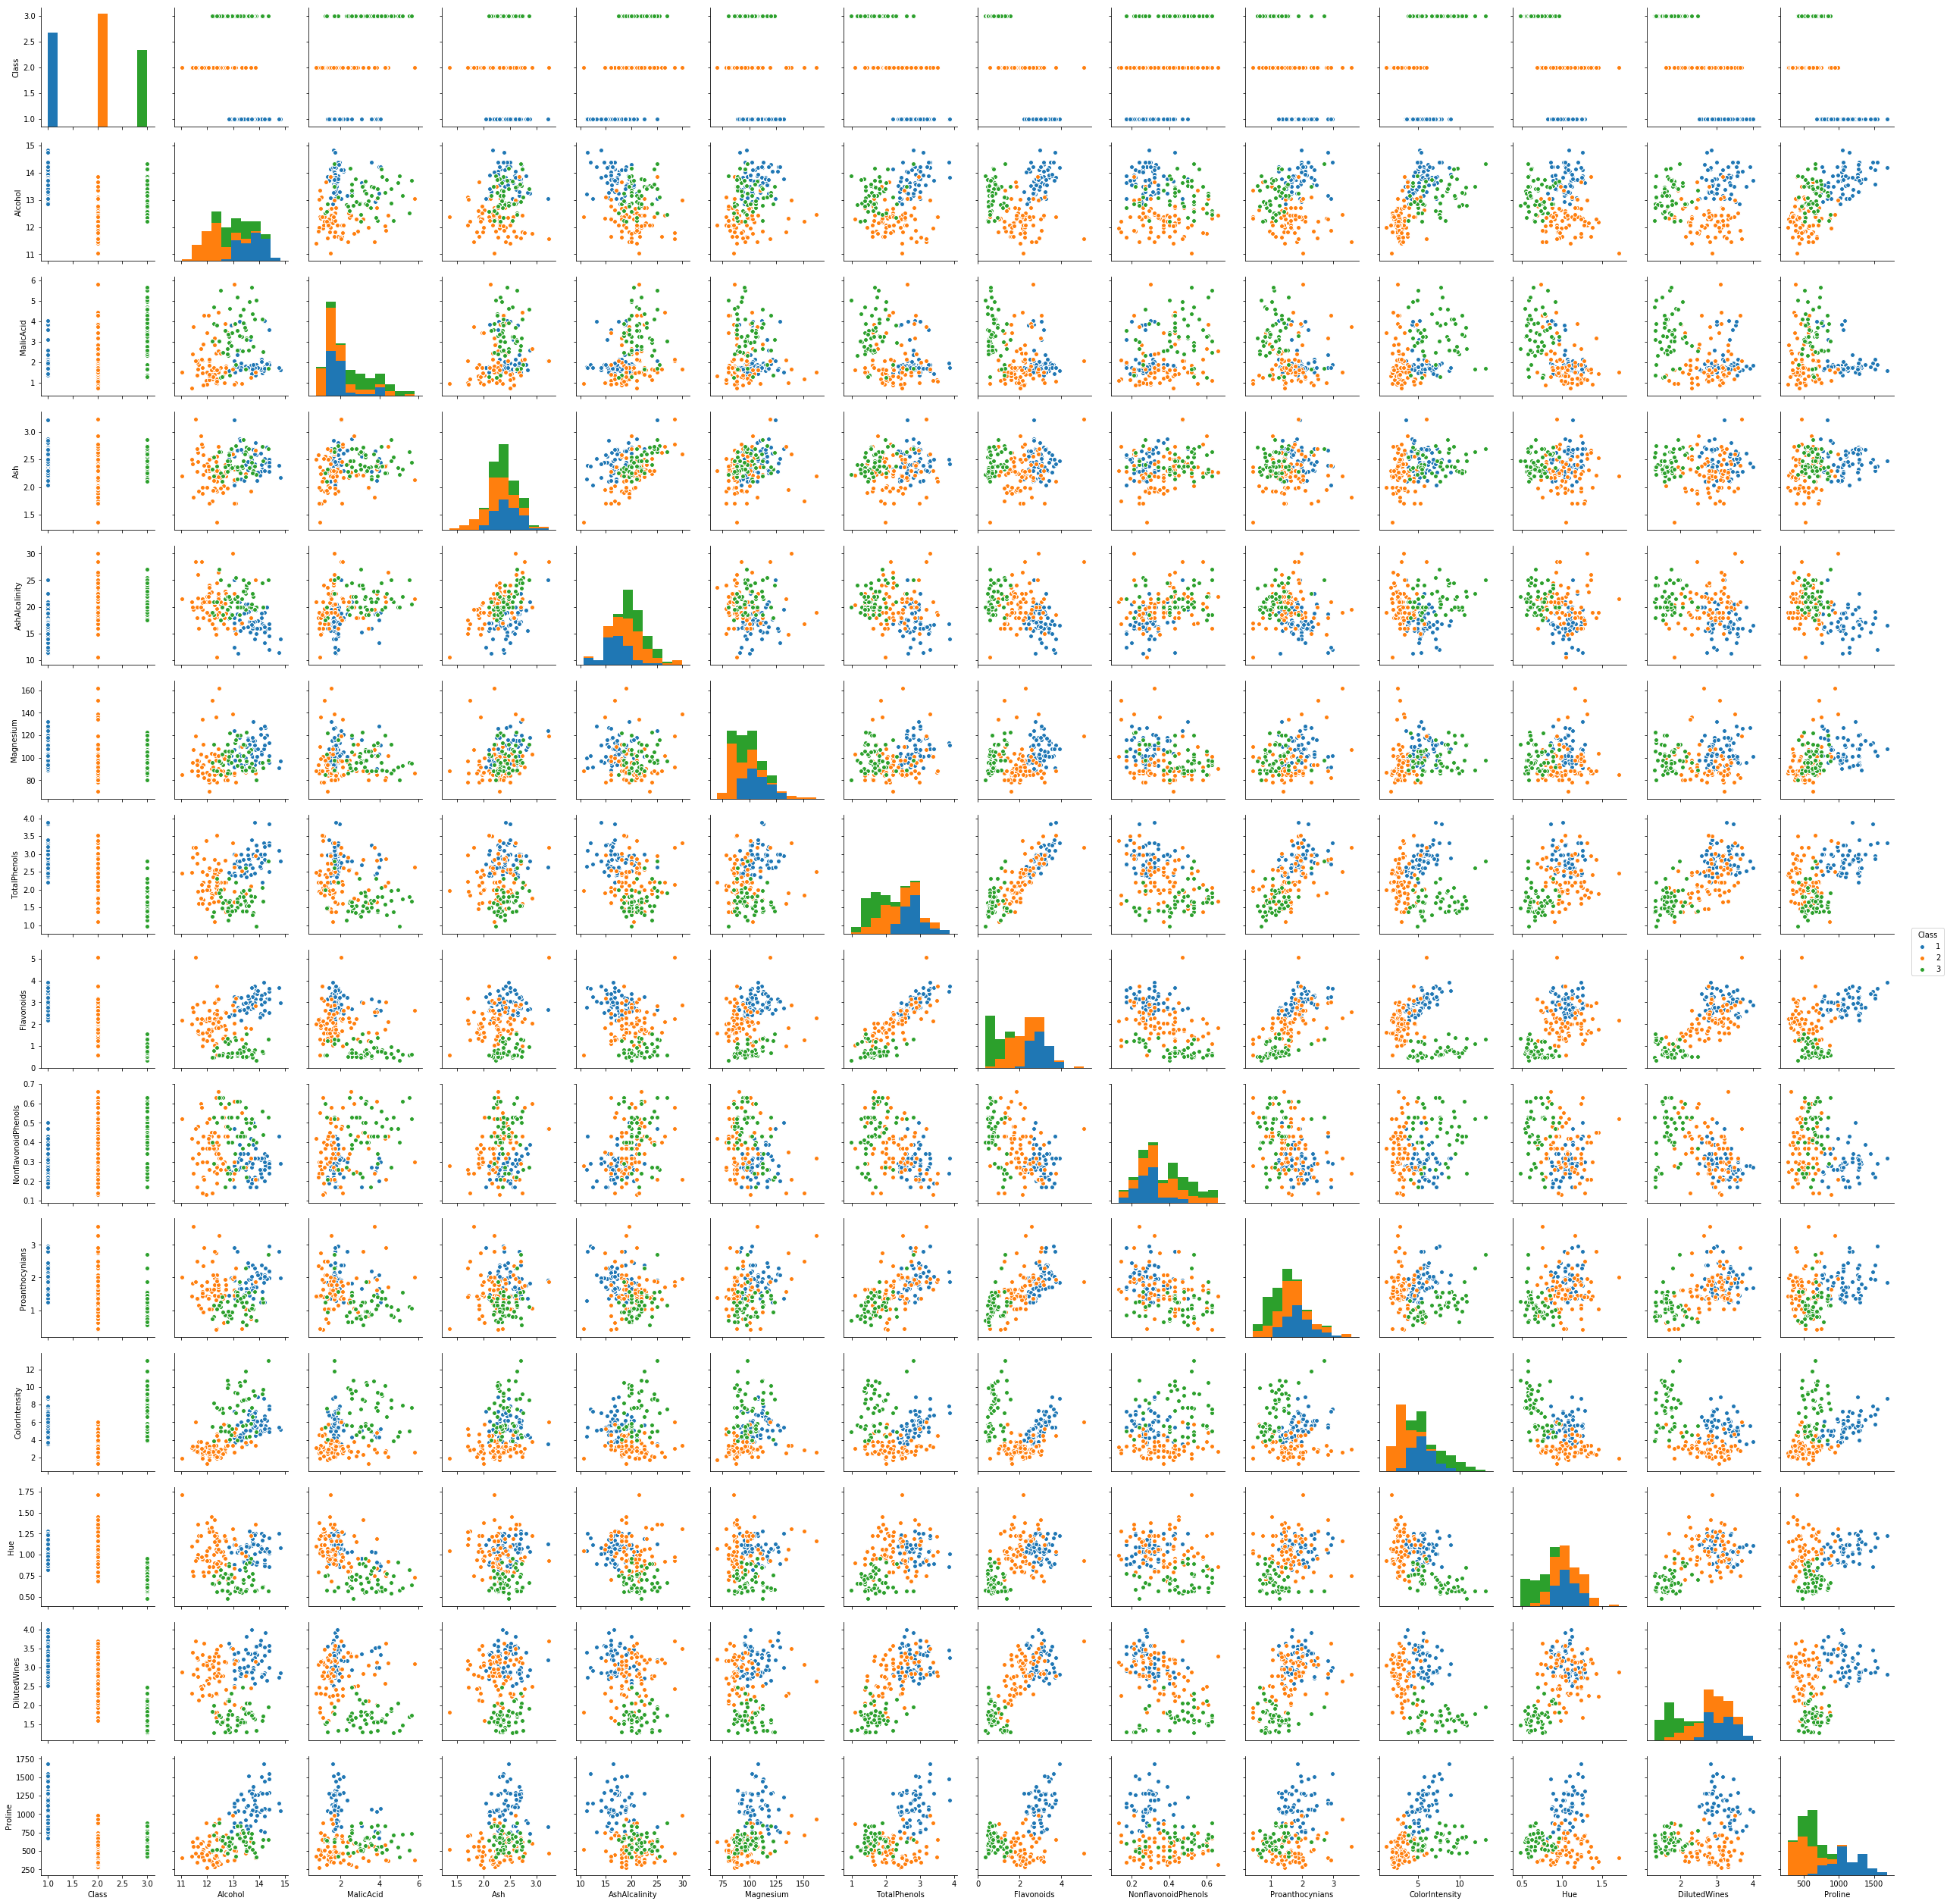

In [4]:
sns.pairplot(data=dataset,hue='Class')
plt.show()

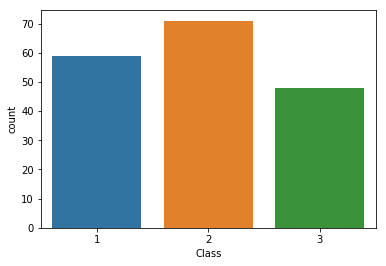

In [5]:
sns.countplot(x='Class',data=dataset)
plt.show()

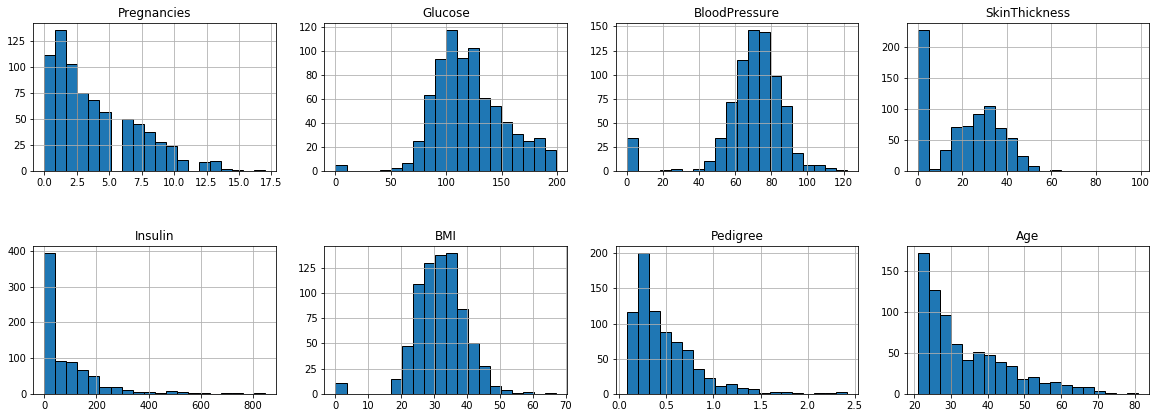

In [9]:
columns=dataset.columns[:8]
plt.subplots(figsize=(20,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),4,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataset[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

768
67.1


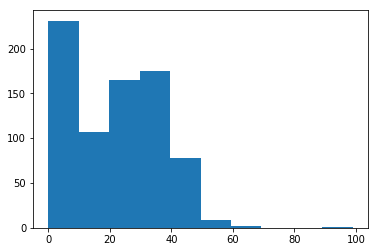

In [10]:
print(len(dataset))
print(dataset.BMI.max())
plt.hist(dataset.SkinThickness)
plt.show()

In [242]:
from collections import Counter
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pedigree','Age']
attr_intervals = {}
xda = dataset.apply(lambda x: pd.cut(x, bins_num, labels=list(range(bins_num))), axis=0)
for col in cols:
    attr_intervals[col] = pd.cut(dataset[col], bins_num, labels=list(range(bins_num)))

y = dataset['Outcome']
mod = MultinomialNB()
mod.fit(xda, y)
mod.predict()
    
attr_probabilities_all = {}
for col in cols:
    attr_probabilities_all[col] = pd.value_counts(attr_intervals[col])

z = {}
for col in cols:
    z[col] = Counter(attr_intervals[col])
    
print(z['Pregnancies'])
    
dataset_class_dependant = {}
for outcome in outcomes:
    dataset_class_dependant[outcome] = dataset[dataset['Outcome']==outcome]
    
# attr_dataset_class_dependant = {}
# for col in cols:
#     attr_dataset_class_dependant[col] = pd.cut(dataset_class_dependant[col], bins_num)    

outcomes = set(dataset['Outcome'])
# print(outcomes)
a = {}
for clas in outcomes:
    temp = {}
#     print(clas)
    for col in cols:
#         print(col)
        temp[col] = pd.cut(dataset_class_dependant[clas][col], bins_num)
    a[clas] = temp

print('---------------')
print(outcomes)

print('---------------')
obj_0 = dataset.iloc[0]
obj_0_attr_0 = obj_0['Pregnancies']

# attr_interval = next(interval for interval in attr_intervals['Pregnancies'] if obj_0_attr_0 in interval)
# print(attr_interval)
    

Counter({0: 424, 1: 175, 2: 135, 3: 30, 4: 4})
---------------
{0, 1}
---------------


In [106]:
for col in cols:
    print(pd.value_counts(attr_intervals[col]))
    print(pd.value_counts(attr_intervals2[col]))

(-0.017, 3.4]    424
(3.4, 6.8]       175
(6.8, 10.2]      135
(10.2, 13.6]      30
(13.6, 17.0]       4
Name: Pregnancies, dtype: int64
(-0.017, 3.4]    113
(6.8, 10.2]       75
(3.4, 6.8]        60
(10.2, 13.6]      16
(13.6, 17.0]       4
Name: Pregnancies, dtype: int64
(79.6, 119.4]     367
(119.4, 159.2]    258
(159.2, 199.0]    102
(39.8, 79.6]       36
(-0.199, 39.8]      5
Name: Glucose, dtype: int64
(119.4, 159.2]    114
(159.2, 199.0]     84
(79.6, 119.4]      67
(-0.199, 39.8]      2
(39.8, 79.6]        1
Name: Glucose, dtype: int64
(48.8, 73.2]      368
(73.2, 97.6]      330
(-0.122, 24.4]     36
(97.6, 122.0]      19
(24.4, 48.8]       15
Name: BloodPressure, dtype: int64
(68.4, 91.2]      164
(45.6, 68.4]       68
(91.2, 114.0]      18
(-0.114, 22.8]     16
(22.8, 45.6]        2
Name: BloodPressure, dtype: int64
(19.8, 39.6]      340
(-0.099, 19.8]    338
(39.6, 59.4]       87
(59.4, 79.2]        2
(79.2, 99.0]        1
Name: SkinThickness, dtype: int64
(19.8, 39.6]      

In [286]:
bins_num = 5
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pedigree','Age']
#Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin
#BMI    Pedigree         Age
# print(dataset.shape)
bins_stratified = dataset.apply(lambda x: pd.qcut(x, bins_num, duplicates='drop'), axis=0)
diab=dataset[dataset['Outcome']==1]
not_diab=dataset[dataset['Outcome']==0]   
bins = dataset.apply(lambda x: pd.cut(x, bins_num), axis=0)
bins_sick = diab.apply(lambda x: pd.cut(x, bins_num), axis=0)
bins_not_sick = not_diab.apply(lambda x: pd.cut(x, bins_num), axis=0)
# print(X[:10])
# abc['Pregnancies'] = pd.cut(dataset['Pregnancies'], bins_num)
# a = []
# pregers = bins['SkinThickness']
# for row in pd.value_counts(pregers):
#     print(row)
# #     a.append(row)
# print(pd.value_counts(pregers))

# for row in bins:
#     print(row)
#     for val in bins[row]:
#         print(val)

# for col in bins.columns:
#     print(col)
#     print(bins[col])
#     for val in pd.value_counts(bins[col]):
#         print(val)
# print(pd.value_counts(bins_stratified['SkinThickness']))

attribute = dataset['Pregnancies']
attribute_bins = pd.cut(attribute, bins_num)
    
obj_0 = dataset.iloc[0]
obj_0_attr_0 = obj_0['Pregnancies']

attr_interval = next(interval for interval in attribute_bins if obj_0_attr_0 in interval)
# print(attr_interval)

for col in bins:
    print(col)
    for al,sick,not_sick in zip(pd.value_counts(bins[col]), pd.value_counts(bins_sick[col]), pd.value_counts(bins_not_sick[col])):
        print('All:',al,' Sick:', sick, ' Not sick:', not_sick)

Pregnancies
All: 424  Sick: 113  Not sick: 263
All: 175  Sick: 75  Not sick: 129
All: 135  Sick: 60  Not sick: 54
All: 30  Sick: 16  Not sick: 40
All: 4  Sick: 4  Not sick: 14
Glucose
All: 367  Sick: 114  Not sick: 296
All: 258  Sick: 84  Not sick: 148
All: 102  Sick: 67  Not sick: 32
All: 36  Sick: 2  Not sick: 21
All: 5  Sick: 1  Not sick: 3
BloodPressure
All: 368  Sick: 164  Not sick: 262
All: 330  Sick: 68  Not sick: 198
All: 36  Sick: 18  Not sick: 20
All: 19  Sick: 16  Not sick: 12
All: 15  Sick: 2  Not sick: 8
SkinThickness
All: 340  Sick: 123  Not sick: 159
All: 338  Sick: 103  Not sick: 139
All: 87  Sick: 40  Not sick: 131
All: 2  Sick: 1  Not sick: 63
All: 1  Sick: 1  Not sick: 8
Insulin
All: 642  Sick: 203  Not sick: 426
All: 100  Sick: 50  Not sick: 58
All: 17  Sick: 9  Not sick: 11
All: 6  Sick: 5  Not sick: 3
All: 3  Sick: 1  Not sick: 2
BMI
All: 492  Sick: 196  Not sick: 298
All: 171  Sick: 51  Not sick: 135
All: 90  Sick: 16  Not sick: 49
All: 11  Sick: 3  Not sick: 9
A

In [270]:
from sklearn.naive_bayes import MultinomialNB
sum = 0
sum2 = 0
for i in range(10):
    train_X, test_X, train_Y, test_Y = train_test_split(xda, y, test_size=0.2)
    model = GaussianNB().fit(train_X, train_Y)
    y_pred = model.predict(test_X)
    errors = (test_X.shape[0],(test_Y != y_pred).sum())
    accuracy = 100-errors[1]/errors[0]*100
    sum += accuracy
    sum2 += f1_score(test_Y, y_pred,average='macro')
print(sum/10)
print(sum2/10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


30.194805194805195
0.24744667662054395


### correlation

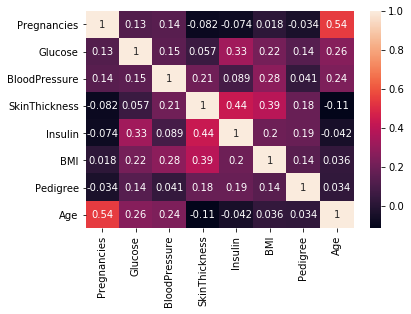

In [413]:
X = dataset.iloc[:, :8]
y = dataset.iloc[:, 0]
sns.heatmap(X.corr(), annot = True)

### Replace Zeroes with the median value of the column

In [ ]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)

In [425]:
data_copy = X.copy()
for col in data_copy:
    cut = pd.cut(data_copy[col], bins=5)
    data_copy[col] = cut

xa = MultinomialNB(alpha=1.0)
xa.fit(data_copy, y)

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

### Split 90/10

In [399]:
sum = 0
sumf1 = 0
xda = X.apply(lambda x: pd.cut(x, bins_num, labels=list(range(bins_num))))
xxx = X.apply(lambda x: pd.cut(x, bins_num))

data_copy = data.duplicated
for col in data:
    cut = pd.cut(data[col], bins=5)
    data[col] = cut
    
print(data)
mod = MultinomialNB(alpha=1.0)
mod.fit(data, y)

missing_bins = set(range(9))-set(xda['SkinThickness'])

item = xda.iloc[0]

for miss in missing_bins:
    pass

for i in range(10):
    train_X, test_X, train_Y, test_Y = train_test_split(xda, y, test_size=0.2)
    model = MultinomialNB().fit(train_X, train_Y)
    y_pred = model.predict(test_X)
    errors = (test_X.shape[0],(test_Y != y_pred).sum())
    accuracy = 100-errors[1]/errors[0]*100
    sum += accuracy
    sumf1 += f1_score(y_true=test_Y, y_pred=y_pred, average='macro')
print(sum/10)
print(sumf1*100/10)

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

### Feature scaling -> removing the mean and scaling to unit variance

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### KFold

In [353]:
outcome=dataset['Outcome']
data=dataset[dataset.columns[:8]]
folds = 5
train,test=train_test_split(dataset,test_size=1/folds)
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']
model = GaussianNB().fit(train_X, train_Y)
y_pred = model.predict(test_X)
errors = (test_X.shape[0],(test_Y != y_pred).sum())
accuracy = 100-errors[1]/errors[0]*100
print(accuracy)
print(f1_score(y_pred=y_pred,y_true=test_Y))

72.72727272727273
0.625


### Stratified KFold

In [135]:
outcome=dataset['Outcome']
data=dataset[dataset.columns[:8]]
folds = 10
train,test = train_test_split(dataset,test_size=1/folds,stratify=dataset['Outcome'])
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']
model = GaussianNB().fit(train_X, train_Y)
y_pred = model.predict(test_X)
errors = (test_X.shape[0],(test_Y != y_pred).sum())
accuracy = 100-errors[1]/errors[0]*100
print(accuracy)

80.51948051948051


### Model = Gaussian Naive Bayes classifier

In [133]:
model = GaussianNB()

### Prediction

In [132]:
y_pred = model.predict(test_X)
errors = (test_X.shape[0],(test_Y != y_pred).sum())
print("Number of mislabeled points out of a total %d points : %d"
      % errors)
print("Accuracy %% : %.2f" % (100-errors[1]/errors[0]*100))

Number of mislabeled points out of a total 77 points : 12
Accuracy % : 84.42


### Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
# F1 = 2 * (precision * recall) / (precision + recall)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))